In [1]:
import os 
import sys 

sys.path.insert(0, '..')

from process_bigraph import Composite
from process_bigraph.experiments.parameter_scan import RunProcess

from biosimulator_processes.processes.amici_process import AmiciUTC
from biosimulator_processes import CORE 
from biosimulator_processes.utils import plot_utc_outputs

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici']
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [2]:
omex_dirpath = './examples/sbml-core/Elowitz-Nature-2000-Repressilator'
model_path = os.path.join(omex_dirpath, 'BIOMD0000000012_url.xml')
reports_path = os.path.join(omex_dirpath, 'reports.h5')

obs1 = ["floating_species_concentrations", "ci_protein"]
proc_addresses = ['copasi', 'tellurium', 'amici']
proc_address = 'amici'

amici_process_config = {
    'model': {'model_source': omex_dirpath},
    # 'time_config': {'step_size': 0.2, 'duration': 1000, 'num_steps': 5001}
}

In [3]:
amici_process = AmiciUTC(config=amici_process_config)

2024-05-29 02:21:08.434 - amici.sbml_import - INFO - Finished importing SBML                         (7.86E-02s)
2024-05-29 02:21:08.529 - amici.sbml_import - INFO - Finished processing SBML observables            (8.71E-02s)
2024-05-29 02:21:08.536 - amici.sbml_import - INFO - Finished processing SBML event observables      (1.21E-06s)
2024-05-29 02:21:08.581 - amici.de_model - INFO - Finished computing xdot                            (6.14E-03s)
2024-05-29 02:21:08.595 - amici.de_model - INFO - Finished computing x0                              (6.43E-03s)
2024-05-29 02:21:08.631 - amici.de_model - INFO - Finished computing w                               (2.93E-02s)
2024-05-29 02:21:10.409 - amici.de_export - INFO - Finished generating cpp code                      (1.77E+00s)
2024-05-29 02:21:28.160 - amici.de_export - INFO - Finished compiling cpp code                       (1.77E+01s)


In [4]:
results = amici_process.update()

In [10]:
amici_process.duration

600

In [8]:
from biosimulator_processes.io import get_sedml_time_config

get_sedml_time_config(os.path.join(omex_dirpath, 'simulation.sedml'))

{'id': 'simulation',
 'initialTime': '0',
 'outputStartTime': '400',
 'outputEndTime': '1000',
 'numberOfPoints': '600',
 'algorithm': 'KISAO:0000019'}

<Axes: >

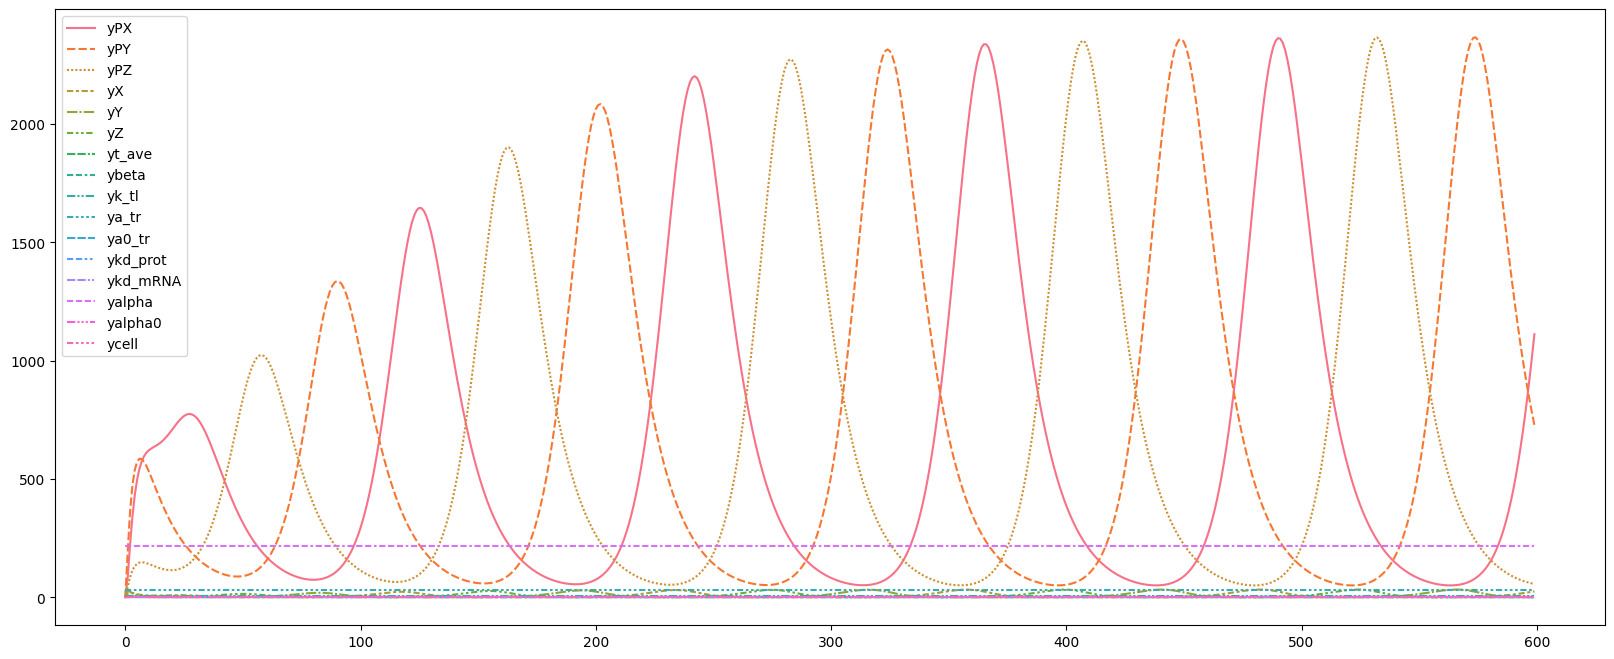

In [9]:
plot_utc_outputs(results, simulator_name='Amici')

In [ ]:


# Example usage:
file_path = os.path.join(omex_dirpath, 'simulation.sedml')
time_course_data = extract_uniform_time_course(file_path)
print(time_course_data)

In [ ]:
from zipfile import ZipFile

with ZipFile(omex_dirpath + '.omex', 'r') as f:
    f.extractall(path="/Users/alex/Desktop/uchc_work")

In [ ]:
!ls ~/desktop/uchc_work

In [ ]:
! cat ~/desktop/uchc_work/simulation.sedml